In [173]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:


from sklearn.naive_bayes import MultinomialNB # nlp algo use to Positive , Negative comment

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words cloud


import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [174]:
comment_data = pd.read_csv('/workspaces/LikelihoodClassificationOfBiases/data/twitter_sentiment.csv')

In [175]:
comment_data.head()

,entry,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [176]:
comment_data.tail()

,entry,topic,sentiment,text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [177]:
comment_data.info

<bound method DataFrame.info of        entry        topic sentiment  \
0       2401  Borderlands  Positive   
1       2401  Borderlands  Positive   
2       2401  Borderlands  Positive   
3       2401  Borderlands  Positive   
4       2401  Borderlands  Positive   
...      ...          ...       ...   
74677   9200       Nvidia  Positive   
74678   9200       Nvidia  Positive   
74679   9200       Nvidia  Positive   
74680   9200       Nvidia  Positive   
74681   9200       Nvidia  Positive   

                                                    text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that m

In [178]:
comment_data.isnull().sum()

entry          0
topic          0
sentiment      0
text         686
dtype: int64

In [179]:
comment_data.dropna(subset=['text'] , inplace=True)

In [180]:
comment_data

,entry,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [181]:
comment_data.isnull().sum()

entry        0
topic        0
sentiment    0
text         0
dtype: int64

In [182]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(comment_data.sentiment.value_counts())

In [183]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [184]:
comment_data.text[0]

'im getting on borderlands and i will murder you all ,'

In [185]:
print('Getting words tokenized ...')
comment_data['text_tokenized'] = comment_data.text.map(lambda t: tokenizer.tokenize(t)) # doing with all rows


Getting words tokenized ...


In [186]:
stemmer = SnowballStemmer("english") # choose a language

In [187]:
print('Getting words stemmed ...')
comment_data['text_stemmed'] = comment_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

Getting words stemmed ...


In [188]:
comment_data.sample(5)

,entry,topic,sentiment,text,text_tokenized,text_stemmed
53655,2020,CallOfDuty,Positive,@CallofDuty really trouble themselves with war...,"[CallofDuty, really, trouble, themselves, with...","[callofduti, realli, troubl, themselv, with, w..."
57372,11441,TomClancysRainbowSix,Neutral,XP Women's League. Season 3 | Week 2. . LIVE N...,"[XP, Women, s, League, Season, Week, LIVE, NOW...","[xp, women, s, leagu, season, week, live, now,..."
35381,8076,Microsoft,Negative,***Don't trust Windows 10 - that's a privacy n...,"[Don, t, trust, Windows, that, s, a, privacy, ...","[don, t, trust, window, that, s, a, privaci, n..."
48803,5977,HomeDepot,Irrelevant,Ew I don’t even seem safe in my damn neighborh...,"[Ew, I, don, t, even, seem, safe, in, my, damn...","[ew, i, don, t, even, seem, safe, in, my, damn..."
59025,3318,Facebook,Negative,Mark Zuckerberg has proved dismissive of the p...,"[Mark, Zuckerberg, has, proved, dismissive, of...","[mark, zuckerberg, has, prove, dismiss, of, th..."


In [189]:
print('Getting joiningwords ...')
comment_data['text_sent'] = comment_data['text_stemmed'].map(lambda l: ' '.join(l))

Getting joiningwords ...


In [190]:
# sliceing classes
negative_comment = comment_data[comment_data.sentiment == 'Negative']
positive_comment = comment_data[comment_data.sentiment == 'Positive']
neutral_comment= comment_data[comment_data.	sentiment == 'Neutral']
irrelevant_comment = comment_data[comment_data.sentiment == 'Irrelevant']

In [191]:
positive_comment.head()

,entry,topic,sentiment,text,text_tokenized,text_stemmed,text_sent
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",im get on borderland and i will murder you all
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[I, am, coming, to, the, borders, and, I, will...","[i, am, come, to, the, border, and, i, will, k...",i am come to the border and i will kill you all
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, on, borderlands, and, i, will, k...","[im, get, on, borderland, and, i, will, kill, ...",im get on borderland and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, on, borderlands, and, i, will, mu...","[im, come, on, borderland, and, i, will, murde...",im come on borderland and i will murder you all
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, on, borderlands, and, i, will, m...","[im, get, on, borderland, and, i, will, murder...",im get on borderland and i will murder you me all


In [192]:
negative_comment.head()

,entry,topic,sentiment,text,text_tokenized,text_stemmed,text_sent
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,"[the, biggest, dissappoinment, in, my, life, c...","[the, biggest, dissappoin, in, my, life, came,...",the biggest dissappoin in my life came out a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,"[The, biggest, disappointment, of, my, life, c...","[the, biggest, disappoint, of, my, life, came,...",the biggest disappoint of my life came a year ago
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...,"[The, biggest, disappointment, of, my, life, c...","[the, biggest, disappoint, of, my, life, came,...",the biggest disappoint of my life came a year ago
27,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...,"[the, biggest, dissappoinment, in, my, life, c...","[the, biggest, dissappoin, in, my, life, come,...",the biggest dissappoin in my life come out a y...
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...,"[For, the, biggest, male, dissappoinment, in, ...","[for, the, biggest, male, dissappoin, in, my, ...",for the biggest male dissappoin in my life cam...


In [193]:
#create cv object
cv = CountVectorizer()

In [194]:
feature = cv.fit_transform(comment_data.text_sent) #transform all text which we tokenize and stemmed

In [195]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [196]:
trainX, testX, trainY, testY = train_test_split(feature, comment_data.sentiment)  # spliting data

In [197]:
# create mnb object
mnb = MultinomialNB()

In [198]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [199]:
mnb.score(testX,testY)

0.7257689604843505

In [200]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))

Training Accuracy : 0.7669783952285709
Testing Accuracy : 0.7257689604843505


In [201]:
pipeline_mnb = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MultinomialNB())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [202]:
trainX, testX, trainY, testY = train_test_split(comment_data.text, comment_data.sentiment)

In [203]:
pipeline_mnb.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('multinomialnb', MultinomialNB())])

In [204]:
pipeline_mnb.score(testX,testY) 

0.7534461322233634

Training Accuracy : 0.7975926626664505
Testing Accuracy : 0.7534461322233634

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    Negative       0.64      0.83      0.72      2410
    Positive       0.86      0.72      0.78      6772
     Neutral       0.67      0.82      0.74      3731
  Irrelevant       0.79      0.72      0.75      5586

    accuracy                           0.75     18499
   macro avg       0.74      0.77      0.75     18499
weighted avg       0.77      0.75      0.76     18499


CONFUSION MATRIX


<Axes: >

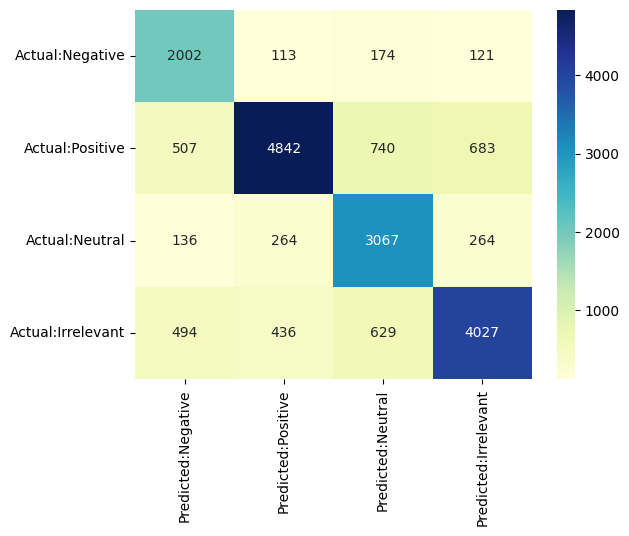

In [205]:
print('Training Accuracy :',pipeline_mnb.score(trainX,trainY))
print('Testing Accuracy :',pipeline_mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_mnb.predict(testX), testY),
            columns = ['Predicted:Negative', 'Predicted:Positive' , 'Predicted:Neutral', 'Predicted:Irrelevant'],
            index = ['Actual:Negative', 'Actual:Positive' , 'Actual:Neutral', 'Actual:Irrelevant'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_mnb.predict(testX), testY,
                            target_names =['Negative','Positive', 'Neutral' , ' Irrelevant']))

print('\nCONFUSION MATRIX')
plt.figure()
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [206]:
pickle.dump(pipeline_mnb,open('comment.pkl','wb'))

In [207]:
loaded_model = pickle.load(open('comment.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.7534461322233634
